<a href="https://colab.research.google.com/github/AngelicaYazGarEs/EDPI/blob/main/Ejercicio_02_Ecuacion_de_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor. Ejercicio 02

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=\frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1$$
Para:
$$ f(x) = \left\{ \begin{array}{lcc}
             -2, &   si  & 0 < x \leq \frac{1}{2} \\
              0, &  si & \frac{1}{2} < x < 1 \\
             \end{array}
   \right. $$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\frac{4}{\pi}\sum_{n=1}^{\infty} \frac{1}{n} \sin(\frac{n\pi}{2})\cos(n \pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

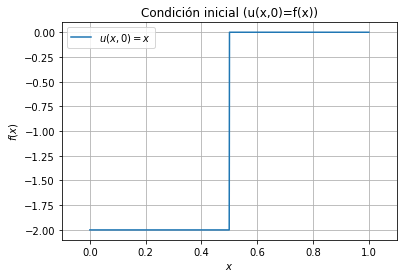

In [ ]:
# como la función está defina por trozos, utilizamos el siguiente código
import numpy as np

x = np.linspace(0, 1, 1000)
f = np.piecewise(x, [(x>=0) & (x<=1/2), (x>1/2) & (x<=1)], [-2, 0])

plt.plot(x, f, label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))");
xlim([-0.1,1.1]),ylim([-2.1,0.1]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial 

$u(x,0)=f(x)=\left\{ \begin{array}{lcc}
             -2, &   si  & 0 < x \leq \frac{1}{2} \\
              0, &  si & \frac{1}{2} < x < 1 \\
             \end{array}
   \right.$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    y = zeros(len(x))
    for n in range(1,N):
        y += cos(n*pi*x)*sin(n*pi/2)/n
    return -1-(4/pi)*y

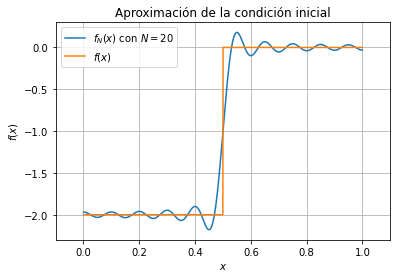

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-2.3,0.3]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

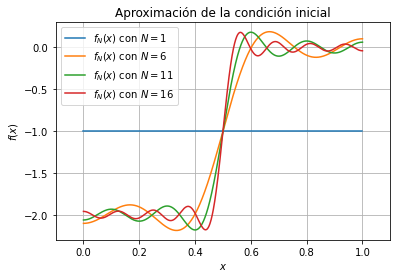

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-2.3,0.3]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [72]:
def u_x_t(x,t,N=50):
    y = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            y[:,i] += cos(n*pi*x)*exp(-n**2*pi**2*t[i])*sin(n*pi/2)/n
    return -1-(4/pi)*y

In [73]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

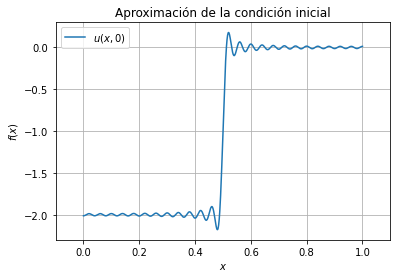

In [74]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-2.3,0.3]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

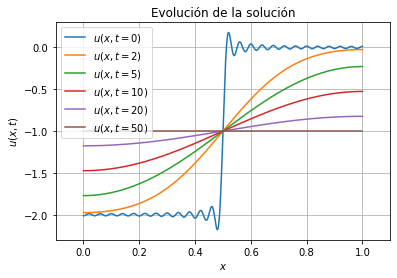

In [77]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,5],label='$u(x,t=5)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plot(x,U[:,50],label='$u(x,t=50)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.1,1.1]),ylim([-2.3,0.3]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

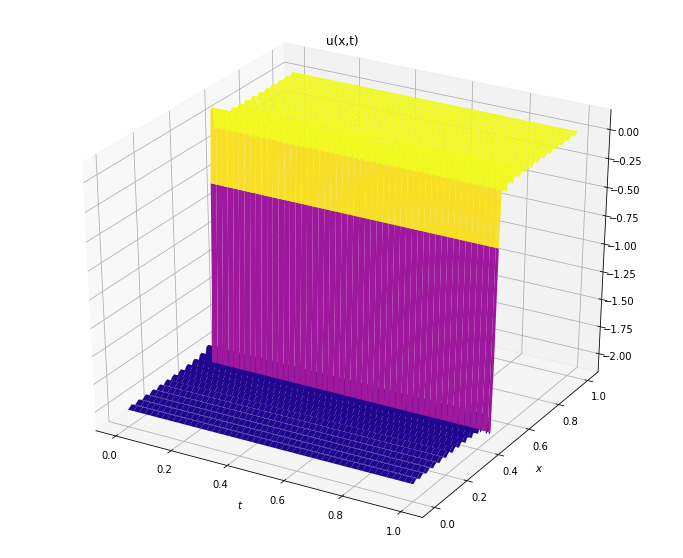

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"